# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
    # If an error is experienced, skip the city
    except (ValueError, KeyError):
        print("City not found. Skipping...")
        pass

# Print completion message outside the loop
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | papatowai
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | pallasovka
Processing Record 15 of Set 1 | alamosa
Processing Record 16 of Set 1 | polyarnyy
Processing Record 17 of Set 1 | tazovsky
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | corral de almaguer
Processing Record 20 of Set 1 | dudinka
Processing Record 21 of Set 1 | ekpoma
Processing Record 22 of Set 1 | vakarai
Processing 

In [30]:
print(len(city_data))
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

580


City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,10.77,90,0,1.54,GB,1712617058
1,port-aux-francais,-49.3500,70.2167,8.18,79,86,15.16,TF,1712617192
2,vilyuchinsk,52.9306,158.4028,3.29,100,97,0.66,RU,1712617193
3,adamstown,-25.0660,-130.1015,23.82,83,81,3.96,PN,1712617128
4,kodiak,57.7900,-152.4072,2.30,76,43,1.86,US,1712617193


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,10.77,90,0,1.54,GB,1712617058
1,port-aux-francais,-49.3500,70.2167,8.18,79,86,15.16,TF,1712617192
2,vilyuchinsk,52.9306,158.4028,3.29,100,97,0.66,RU,1712617193
3,adamstown,-25.0660,-130.1015,23.82,83,81,3.96,PN,1712617128
4,kodiak,57.7900,-152.4072,2.30,76,43,1.86,US,1712617193


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

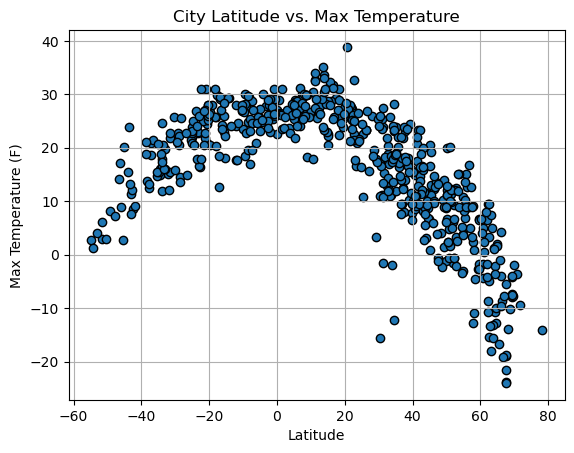

In [34]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

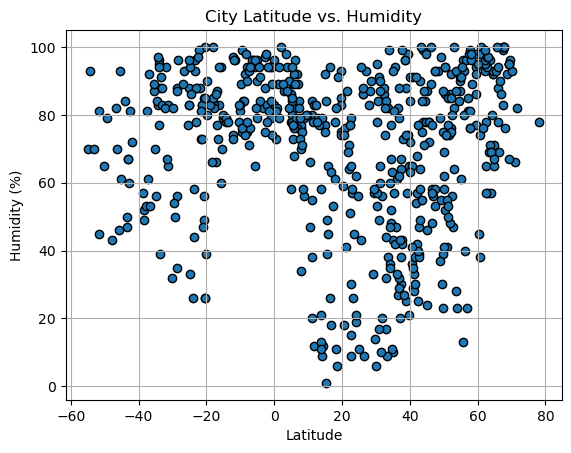

In [35]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

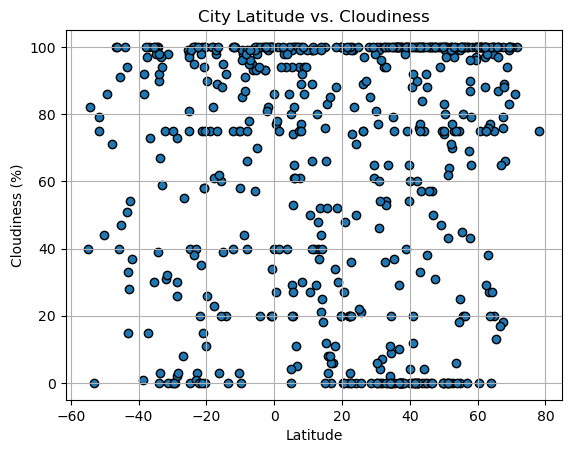

In [36]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

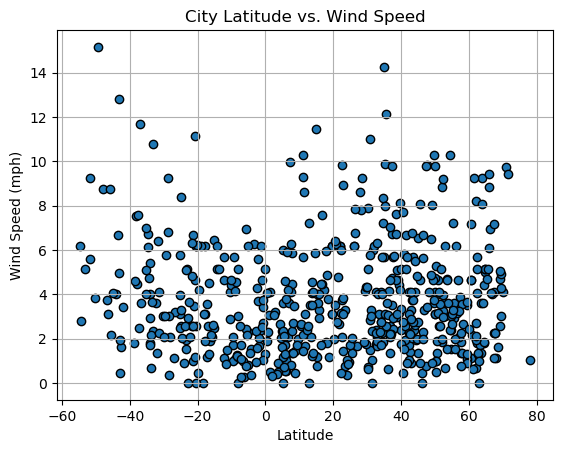

In [37]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Set the title and labels
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Incorporate other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression line
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate regression line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show correlation coefficient
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

In [39]:
# Filter data for cities in the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,10.77,90,0,1.54,GB,1712617058
2,vilyuchinsk,52.9306,158.4028,3.29,100,97,0.66,RU,1712617193
4,kodiak,57.7900,-152.4072,2.30,76,43,1.86,US,1712617193
13,pallasovka,50.0500,46.8833,12.06,62,74,4.10,RU,1712617194
14,alamosa,37.4695,-105.8700,7.96,30,100,4.73,US,1712617195


In [40]:
# Filter data for cities in the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,8.18,79,86,15.16,TF,1712617192
3,adamstown,-25.0660,-130.1015,23.82,83,81,3.96,PN,1712617128
5,ushuaia,-54.8000,-68.3000,2.81,70,40,6.17,AR,1712617193
6,blackmans bay,-43.0167,147.3167,11.40,67,33,0.45,AU,1712617126
7,codrington,-38.2667,141.9667,13.82,52,92,7.53,AU,1712617193


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7218258813260393


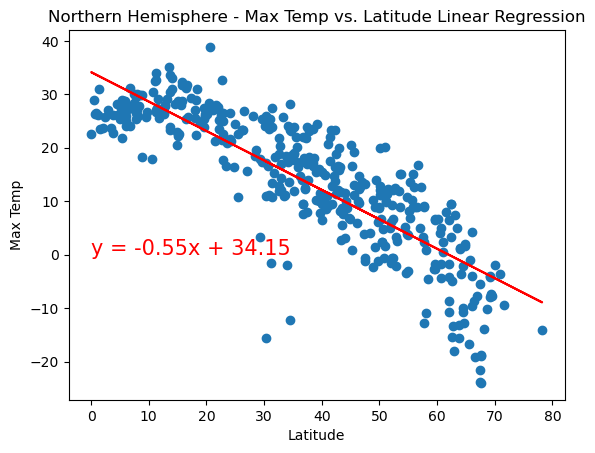

In [41]:
# Perform linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression", (0, 0))

The r-squared is: 0.5924917262974951


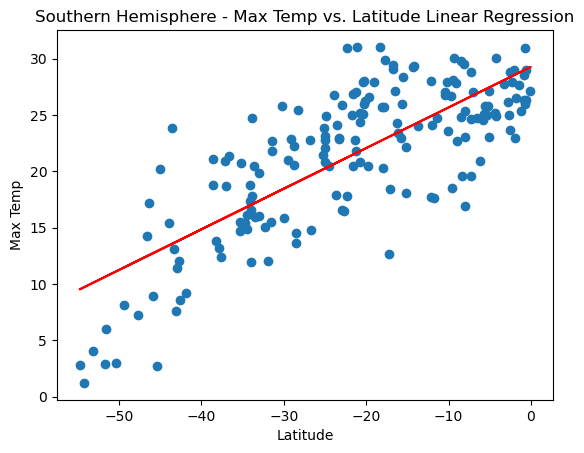

In [42]:
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Latitude", "Max Temp", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression", (-30, 50))

**Discussion about the linear relationship:**
##1.-NorthernHemisphere: the regression shows that for every degree that the latitude of the Northern Hemisphere increases, the temperature decreases 0.55 degrees and that the temperature in theory in the lattitude 0 is 34.15 degrees, it also shows that there is a relationship between latitude and temperature.
##2.-Both graphs show that the closer we get to the Equator the temperatures are higher and the closer we get to the poles the temperature is colder, however in both the dispersion of the data shows that there are other variables that influence the temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.030599313723502237


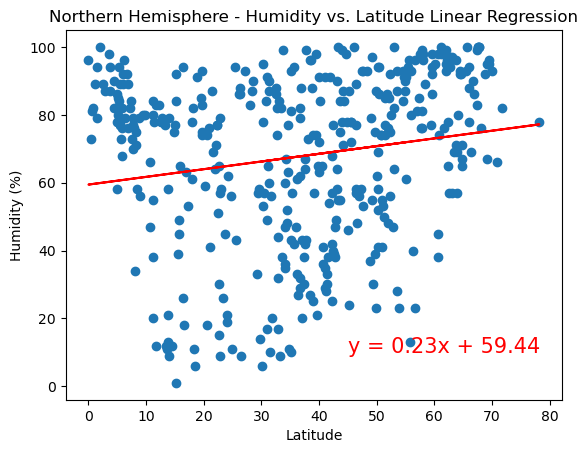

In [43]:
# Perform linear regression on Northern Hemisphere for humidity vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude Linear Regression", (45, 10))

The r-squared is: 0.11472267820125431


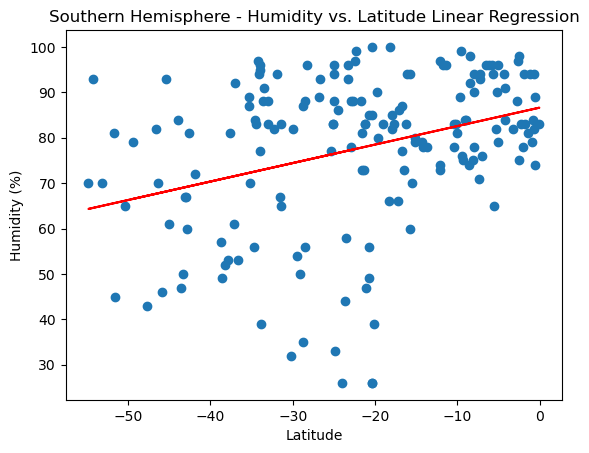

In [44]:
# Perform linear regression on Southern Hemisphere for humidity vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude Linear Regression", (-25, 20))

**Discussion about the linear relationship:**

#Northern Hemisphere; The regression shows that for every degree that the latitude increases, the humidity increases 0.23%, in theory the humidity when the latitude is 0 is 59.44%.


##Both graphs show a certain correlation, however the dispersion of the data shows that there are other variables that better explain the humidity variations.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.017521157809107214


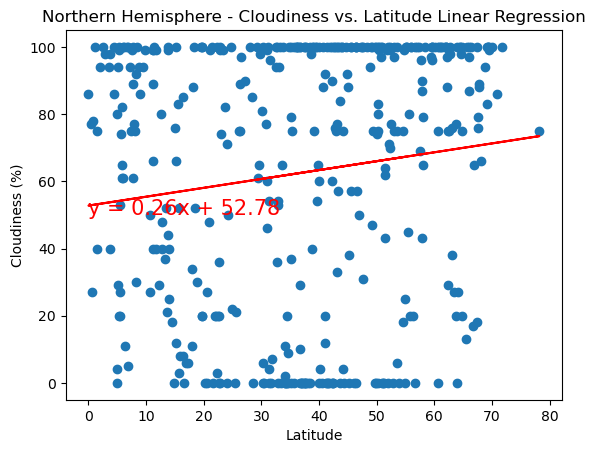

In [45]:
# Perform linear regression on Northern Hemisphere for cloudiness vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression", (0, 50))

The r-squared is: 0.03614342349746607


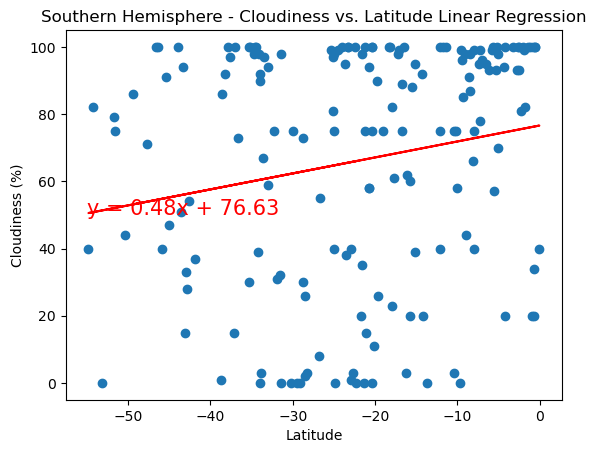

In [46]:
# Perform linear regression on Southern Hemisphere for cloudiness vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", (-55, 50))

**Discussion about the linear relationship:** 

#northernhemisfeiro: the regression shows that for every degree moving north the cloudiness increases 0.26% and that in theory the cloudiness when the latitude is 0 is 52.78%

#Southern Hemisphere: for every degree they get closer to the Equator, cloudiness increases 0.48% and temporarily cloudiness when the latitude is 0 is 76.63%.

##Both graphs will show that the relationship between cloudiness and latitude is not very strong since the data have a high degree of dispersion.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.008684979586725677


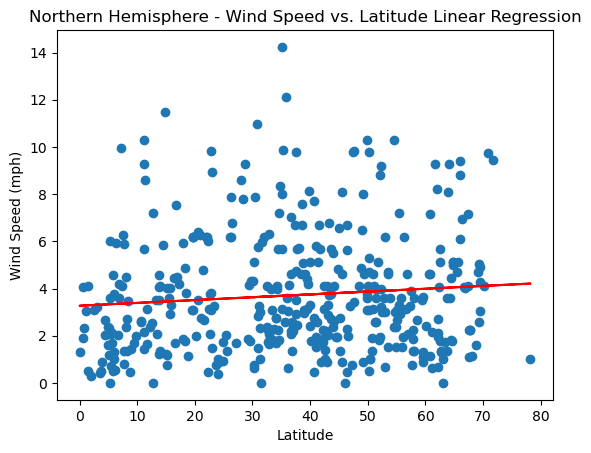

In [47]:
# Perform linear regression on Northern Hemisphere for wind speed vs. latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression", (0, 25))

The r-squared is: 0.11590743017200733


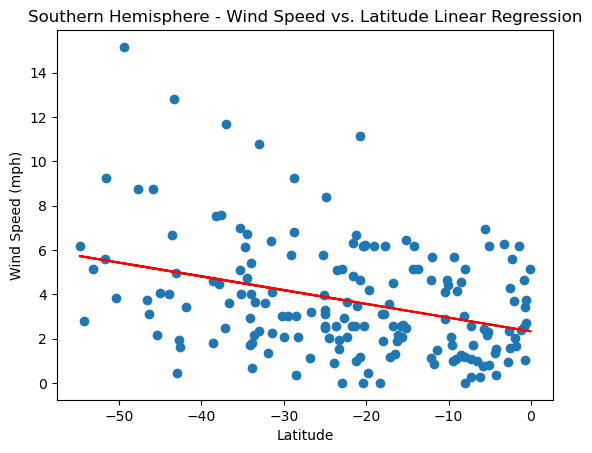

In [48]:
# Perform linear regression on Southern Hemisphere for wind speed vs. latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the plot_linear_regression function
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", (-55, 20))

**Discussion about the linear relationship:** 

###northernhemisfeiro: the regression line is almost horizontal which suggests that there is no strong relationship between wind speed and latitude

#Southern Hemisphere: in the case of the southern hemisphere there is a slight relationship between latitude and wind speed, it shows that the wind speed decreases as it approaches the Ecuador.

#Both graphs show dispersion in their data so there are other variables that better explain the wind speed.